In [1]:
import numpy as np
import matplotlib.pyplot as plt

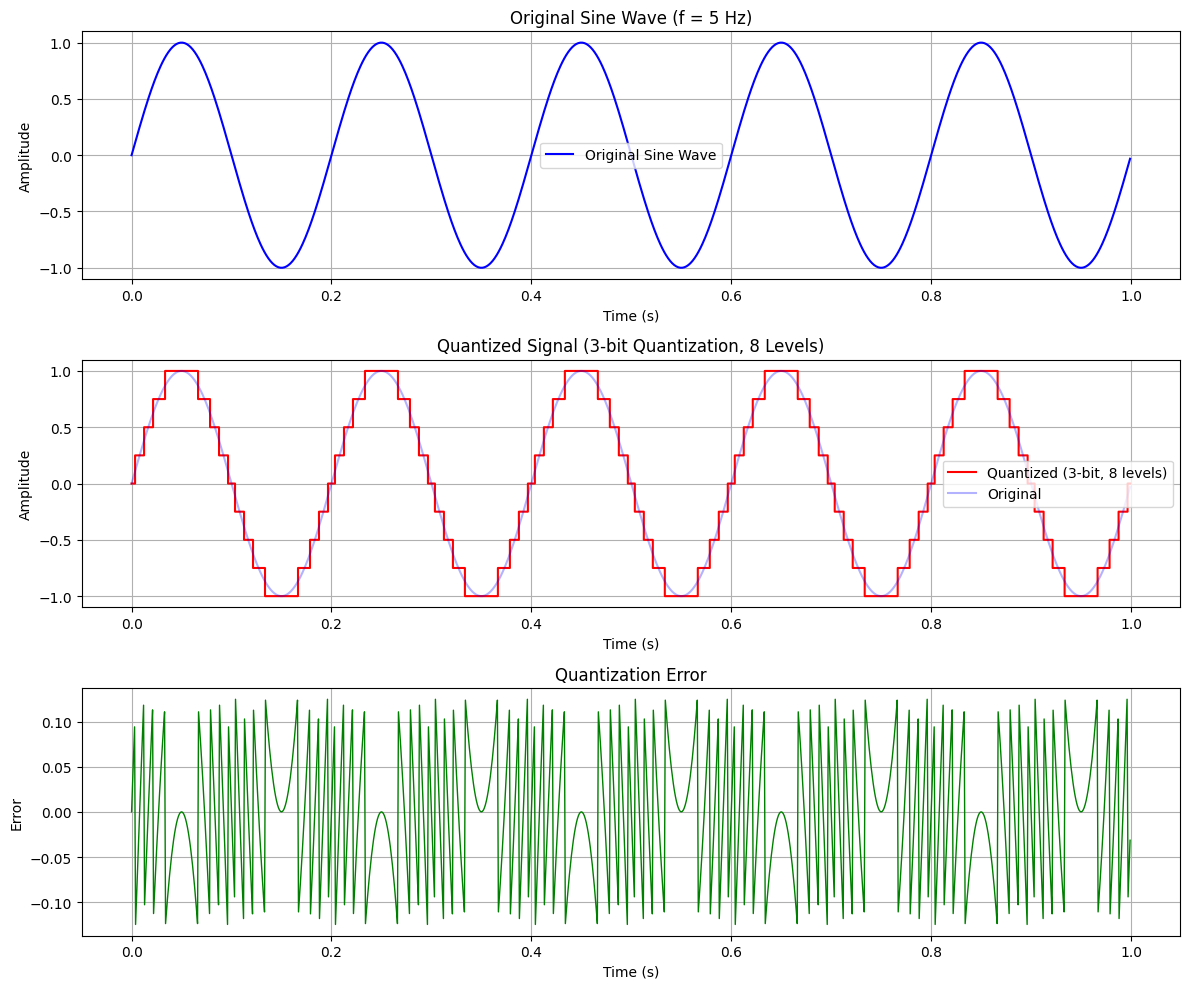

Number of bits: 3
Number of quantization levels: 8
Step size (Δ): 0.2500
Max quantization error: 0.1247


In [2]:
# Parameters
f = 5  # Frequency of sine wave (Hz)
A = 1  # Amplitude
fs = 1000  # Sampling frequency
t = np.arange(0, 1, 1/fs)  # Time vector (1 second)

# Generate sine wave
x = A * np.sin(2 * np.pi * f * t)

# Quantization parameters
n_bits = 3  # Number of bits for quantization
L = 2 ** n_bits  # Number of quantization levels

# Quantization process
x_min, x_max = -A, A
delta = (x_max - x_min) / L  # Step size

# Quantize the signal
x_quantized = np.round((x - x_min) / delta) * delta + x_min
x_quantized = np.clip(x_quantized, x_min, x_max)

# Quantization error
q_error = x - x_quantized

# Plot results
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# Original sine wave
axes[0].plot(t, x, 'b-', linewidth=1.5, label='Original Sine Wave')
axes[0].set_title(f'Original Sine Wave (f = {f} Hz)')
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Amplitude')
axes[0].grid(True)
axes[0].legend()

# Quantized signal
axes[1].step(t, x_quantized, 'r-', linewidth=1.5, where='mid', label=f'Quantized ({n_bits}-bit, {L} levels)')
axes[1].plot(t, x, 'b-', alpha=0.3, label='Original')
axes[1].set_title(f'Quantized Signal ({n_bits}-bit Quantization, {L} Levels)')
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Amplitude')
axes[1].grid(True)
axes[1].legend()

# Quantization error
axes[2].plot(t, q_error, 'g-', linewidth=1)
axes[2].set_title('Quantization Error')
axes[2].set_xlabel('Time (s)')
axes[2].set_ylabel('Error')
axes[2].grid(True)

plt.tight_layout()
plt.show()

print(f"Number of bits: {n_bits}")
print(f"Number of quantization levels: {L}")
print(f"Step size (Δ): {delta:.4f}")
print(f"Max quantization error: {np.max(np.abs(q_error)):.4f}")

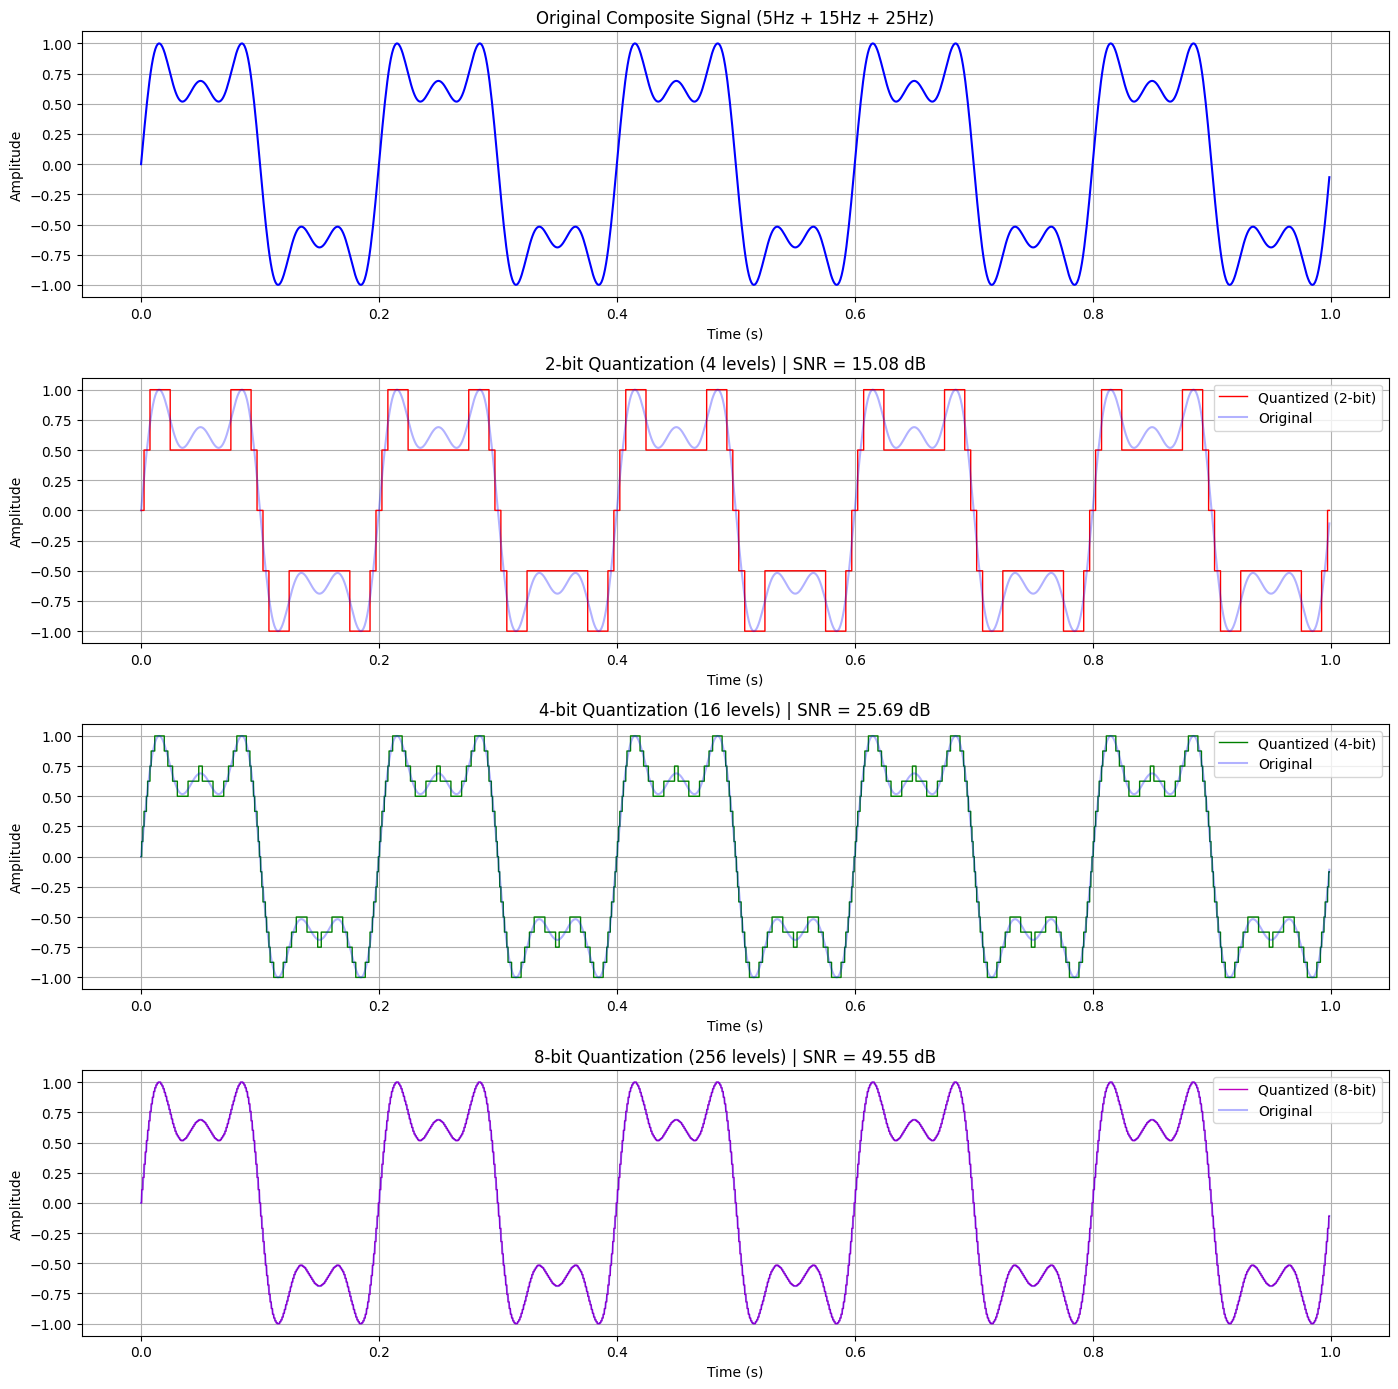

Quantization Comparison:
--------------------------------------------------
2-bit: 4 levels, Δ = 0.5000, SNR = 15.08 dB
4-bit: 16 levels, Δ = 0.1250, SNR = 25.69 dB
8-bit: 256 levels, Δ = 0.0078, SNR = 49.55 dB


In [4]:
# Parameters for composite signal
f1, f2, f3 = 5, 15, 25  # Frequencies (Hz)
A1, A2, A3 = 1, 0.5, 0.3  # Amplitudes
fs = 1000  # Sampling frequency
t = np.arange(0, 1, 1/fs)  # Time vector (1 second)

# Generate composite sine wave
x_composite = A1 * np.sin(2 * np.pi * f1 * t) + \
              A2 * np.sin(2 * np.pi * f2 * t) + \
              A3 * np.sin(2 * np.pi * f3 * t)

# Normalize to [-1, 1] range
x_composite = x_composite / np.max(np.abs(x_composite))

# Quantization with different bit depths
bit_depths = [2, 4, 8]

fig, axes = plt.subplots(4, 1, figsize=(14, 14))

# Original composite signal
axes[0].plot(t, x_composite, 'b-', linewidth=1.5)
axes[0].set_title(f'Original Composite Signal ({f1}Hz + {f2}Hz + {f3}Hz)')
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Amplitude')
axes[0].grid(True)

# Quantize with different bit depths
colors = ['r', 'g', 'm']
for i, n_bits in enumerate(bit_depths):
    L = 2 ** n_bits  # Number of quantization levels
    x_min, x_max = -1, 1
    delta = (x_max - x_min) / L  # Step size
    
    # Quantize
    x_quantized = np.round((x_composite - x_min) / delta) * delta + x_min
    x_quantized = np.clip(x_quantized, x_min, x_max)
    
    # Quantization error
    q_error = x_composite - x_quantized
    snr = 10 * np.log10(np.mean(x_composite**2) / np.mean(q_error**2))
    
    # Plot quantized signal
    axes[i+1].step(t, x_quantized, colors[i] + '-', linewidth=1, where='mid', 
                   label=f'Quantized ({n_bits}-bit)')
    axes[i+1].plot(t, x_composite, 'b-', alpha=0.3, label='Original')
    axes[i+1].set_title(f'{n_bits}-bit Quantization ({L} levels) | SNR = {snr:.2f} dB')
    axes[i+1].set_xlabel('Time (s)')
    axes[i+1].set_ylabel('Amplitude')
    axes[i+1].grid(True)
    axes[i+1].legend()

plt.tight_layout()
plt.show()

# Print comparison
print("Quantization Comparison:")
print("-" * 50)
for n_bits in bit_depths:
    L = 2 ** n_bits
    delta = 2 / L
    x_quantized = np.round((x_composite + 1) / delta) * delta - 1
    x_quantized = np.clip(x_quantized, -1, 1)
    q_error = x_composite - x_quantized
    snr = 10 * np.log10(np.mean(x_composite**2) / np.mean(q_error**2))
    print(f"{n_bits}-bit: {L} levels, Δ = {delta:.4f}, SNR = {snr:.2f} dB")